In [ ]:
# Problem: How can we use Binance API data to analyze Bitcoin price movement?

# Enter api and secret key from Binance

api_key = 'oIiMFE9aa4J4m15UL5KGreX3NUbFfLjs3ayp5VD4DC61mM6gTv11WpoieisUVtvk'
secret_key = 'q8dJvMrbBwhFfo5dmzWx0Cd6UOSmMknxVEUBAk3ESOqc25DaNmG4wJmEyzh7JTIx'

In [ ]:
#Following the quick start tutorial on binance to connect with API

!pip install python-binance pandas mplfinance

In [4]:
import pandas as pd

#From Binance quickstart tutorial

from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

In [7]:
#Authenticating with Binance Client

client = Client(api_key, secret_key)

In [2]:
#Grab tickers from Binance to see what is available... we are focusing on Bitcoin

symbols = client.get_all_tickers()
symbols

NameError: name 'client' is not defined

In [24]:
symbols[11]['price']

'29408.00000000'

In [26]:
#Connect symbols with pandas data frame

symbol_df = pd.DataFrame(symbols)

In [30]:
#List top 5 symbols

symbol_df.head()

,symbol,price
0,ETHBTC,0.06278000
1,LTCBTC,0.00279700
2,BNBBTC,0.00818700
3,NEOBTC,0.00028950
4,QTUMETH,0.00138900


In [31]:
#List bottom 5 symbols

symbol_df.tail()

,symbol,price
2271,ATMTRY,74.51000000
2272,ACMTRY,59.33000000
2273,BARTRY,74.26000000
2274,JUVTRY,63.58000000
2275,PSGTRY,99.36000000


In [33]:
#Finding more information about Bitcoin symbol

symbol_df.loc[11]

symbol           BTCUSDT
price     29408.00000000
Name: 11, dtype: object

In [34]:
symbols[11]

{'symbol': 'BTCUSDT', 'price': '29408.00000000'}

In [45]:
#Get historical data for Bitcoin

historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_3DAY, '1 Jan 2010')
historical

[[1502928000000,
  '4261.48000000',
  '4485.39000000',
  '3850.00000000',
  '4139.98000000',
  '2376.34840400',
  1503187199999,
  '10091212.09232508',
  10813,
  '1863.45329300',
  '7925341.58720944',
  '0'],
 [1503187200000,
  '4120.98000000',
  '4211.08000000',
  '3400.00000000',
  '4040.00000000',
  '2125.51094000',
  1503446399999,
  '8480101.87649425',
  12787,
  '1358.14723500',
  '5450252.25623793',
  '0'],
 [1503446400000,
  '4040.00000000',
  '4453.91000000',
  '4013.89000000',
  '4280.68000000',
  '2362.16805800',
  1503705599999,
  '9929800.22834771',
  21430,
  '616.33747800',
  '2596523.29507228',
  '0'],
 [1503705600000,
  '4280.71000000',
  '4400.00000000',
  '4124.54000000',
  '4386.69000000',
  '1182.64226900',
  1503964799999,
  '5091106.32115720',
  10279,
  '300.62928100',
  '1296170.18598594',
  '0'],
 [1503964800000,
  '4353.65000000',
  '4745.42000000',
  '4313.55000000',
  '4724.89000000',
  '1968.97060100',
  1504223999999,
  '8946077.14650298',
  13871,
  '47

In [ ]:
#The format for the above data is as follows:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [60]:
#Put historical data into pandas data frame

historical_df = pd.DataFrame(historical)

In [61]:
historical_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1502928000000,4261.48000000,4485.39000000,3850.00000000,4139.98000000,2376.34840400,1503187199999,10091212.09232508,10813,1863.45329300,7925341.58720944,0
1,1503187200000,4120.98000000,4211.08000000,3400.00000000,4040.00000000,2125.51094000,1503446399999,8480101.87649425,12787,1358.14723500,5450252.25623793,0
2,1503446400000,4040.00000000,4453.91000000,4013.89000000,4280.68000000,2362.16805800,1503705599999,9929800.22834771,21430,616.33747800,2596523.29507228,0
3,1503705600000,4280.71000000,4400.00000000,4124.54000000,4386.69000000,1182.64226900,1503964799999,5091106.32115720,10279,300.62928100,1296170.18598594,0
4,1503964800000,4353.65000000,4745.42000000,4313.55000000,4724.89000000,1968.97060100,1504223999999,8946077.14650298,13871,471.45214400,2150944.79209775,0


In [62]:
#Set columns in pandas dataframe to match data from Binance API

historical_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [63]:
historical_df.head()


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1502928000000,4261.48000000,4485.39000000,3850.00000000,4139.98000000,2376.34840400,1503187199999,10091212.09232508,10813,1863.45329300,7925341.58720944,0
1,1503187200000,4120.98000000,4211.08000000,3400.00000000,4040.00000000,2125.51094000,1503446399999,8480101.87649425,12787,1358.14723500,5450252.25623793,0
2,1503446400000,4040.00000000,4453.91000000,4013.89000000,4280.68000000,2362.16805800,1503705599999,9929800.22834771,21430,616.33747800,2596523.29507228,0
3,1503705600000,4280.71000000,4400.00000000,4124.54000000,4386.69000000,1182.64226900,1503964799999,5091106.32115720,10279,300.62928100,1296170.18598594,0
4,1503964800000,4353.65000000,4745.42000000,4313.55000000,4724.89000000,1968.97060100,1504223999999,8946077.14650298,13871,471.45214400,2150944.79209775,0


In [64]:
#How many rows and columns?

historical_df.shape

(730, 12)

In [65]:
#We need to convert data types into numeric values

historical_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [70]:
historical_df2 = historical_df

In [81]:
historical_df2

,Open Time,Open,High,Low,Close,Volume,Close Time
0,1502928000000,4261.48000000,4485.39000000,3850.00000000,4139.98000000,2376.34840400,1503187199999
1,1503187200000,4120.98000000,4211.08000000,3400.00000000,4040.00000000,2125.51094000,1503446399999
2,1503446400000,4040.00000000,4453.91000000,4013.89000000,4280.68000000,2362.16805800,1503705599999
3,1503705600000,4280.71000000,4400.00000000,4124.54000000,4386.69000000,1182.64226900,1503964799999
4,1503964800000,4353.65000000,4745.42000000,4313.55000000,4724.89000000,1968.97060100,1504223999999
...,...,...,...,...,...,...,...
725,1690848000000,29232.26000000,30047.50000000,28585.70000000,29193.64000000,119378.22297000,1691107199999
726,1691107200000,29193.65000000,29333.08000000,28807.54000000,29088.42000000,48375.66955000,1691366399999
727,1691366400000,29088.43000000,30244.00000000,28701.03000000,29581.99000000,114671.29863000,1691625599999
728,1691625600000,29581.99000000,29738.00000000,29252.45000000,29430.17000000,53071.97871000,1691884799999


In [76]:
historical_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1502928000000,4261.48000000,4485.39000000,3850.00000000,4139.98000000,2376.34840400,1503187199999,10091212.09232508,10813,1863.45329300,7925341.58720944,0
1,1503187200000,4120.98000000,4211.08000000,3400.00000000,4040.00000000,2125.51094000,1503446399999,8480101.87649425,12787,1358.14723500,5450252.25623793,0
2,1503446400000,4040.00000000,4453.91000000,4013.89000000,4280.68000000,2362.16805800,1503705599999,9929800.22834771,21430,616.33747800,2596523.29507228,0
3,1503705600000,4280.71000000,4400.00000000,4124.54000000,4386.69000000,1182.64226900,1503964799999,5091106.32115720,10279,300.62928100,1296170.18598594,0
4,1503964800000,4353.65000000,4745.42000000,4313.55000000,4724.89000000,1968.97060100,1504223999999,8946077.14650298,13871,471.45214400,2150944.79209775,0


In [ ]:
#We do not need some of these columns, the columns we want to focus on are the OHLC and volume for this dataset


historical_df2 = historical_df2.drop("Quote Asset Volume", axis='columns')
historical_df2 = historical_df2.drop("Number of Trades", axis='columns')
historical_df2 = historical_df2.drop("TB Base Volume", axis='columns')
historical_df2 = historical_df2.drop("TB Quote Volume", axis='columns')
historical_df2 = historical_df2.drop("Ignore", axis='columns')


In [83]:
historical_df2

,Open Time,Open,High,Low,Close,Volume,Close Time
0,1502928000000,4261.48000000,4485.39000000,3850.00000000,4139.98000000,2376.34840400,1503187199999
1,1503187200000,4120.98000000,4211.08000000,3400.00000000,4040.00000000,2125.51094000,1503446399999
2,1503446400000,4040.00000000,4453.91000000,4013.89000000,4280.68000000,2362.16805800,1503705599999
3,1503705600000,4280.71000000,4400.00000000,4124.54000000,4386.69000000,1182.64226900,1503964799999
4,1503964800000,4353.65000000,4745.42000000,4313.55000000,4724.89000000,1968.97060100,1504223999999
...,...,...,...,...,...,...,...
725,1690848000000,29232.26000000,30047.50000000,28585.70000000,29193.64000000,119378.22297000,1691107199999
726,1691107200000,29193.65000000,29333.08000000,28807.54000000,29088.42000000,48375.66955000,1691366399999
727,1691366400000,29088.43000000,30244.00000000,28701.03000000,29581.99000000,114671.29863000,1691625599999
728,1691625600000,29581.99000000,29738.00000000,29252.45000000,29430.17000000,53071.97871000,1691884799999


In [85]:
#We need to convert the time in the historical data

historical_df2['Open Time'] = pd.to_datetime(historical_df2['Open Time']/1000, unit='s')
historical_df2['Close Time'] = pd.to_datetime(historical_df2['Close Time']/1000, unit='s')

In [86]:
historical_df2.head()

,Open Time,Open,High,Low,Close,Volume,Close Time
0,2017-08-17,4261.48000000,4485.39000000,3850.00000000,4139.98000000,2376.34840400,2017-08-19 23:59:59.999000064
1,2017-08-20,4120.98000000,4211.08000000,3400.00000000,4040.00000000,2125.51094000,2017-08-22 23:59:59.999000064
2,2017-08-23,4040.00000000,4453.91000000,4013.89000000,4280.68000000,2362.16805800,2017-08-25 23:59:59.999000064
3,2017-08-26,4280.71000000,4400.00000000,4124.54000000,4386.69000000,1182.64226900,2017-08-28 23:59:59.999000064
4,2017-08-29,4353.65000000,4745.42000000,4313.55000000,4724.89000000,1968.97060100,2017-08-31 23:59:59.999000064


In [87]:
historical_df2.dtypes

Open Time     datetime64[ns]
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time    datetime64[ns]
dtype: object

In [90]:
numeric_values = ['Open', 'High', 'Low', 'Close', 'Volume']

In [91]:
#transformation to numeric values

historical_df2[numeric_values] = historical_df2[numeric_values].apply(pd.to_numeric, axis=1)

In [92]:
historical_df2.dtypes

Open Time     datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Close Time    datetime64[ns]
dtype: object

In [96]:
historical_df2.dtypes.describe

count           7
unique          2
top       float64
freq            5
dtype: object

In [94]:
historical_df2.dtypes.info()

<class 'pandas.core.series.Series'>
Index: 7 entries, Open Time to Close Time
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
7 non-null      object
dtypes: object(1)
memory usage: 412.0+ bytes


In [97]:
historical_df2

,Open Time,Open,High,Low,Close,Volume,Close Time
0,2017-08-17,4261.48,4485.39,3850.00,4139.98,2376.348404,2017-08-19 23:59:59.999000064
1,2017-08-20,4120.98,4211.08,3400.00,4040.00,2125.510940,2017-08-22 23:59:59.999000064
2,2017-08-23,4040.00,4453.91,4013.89,4280.68,2362.168058,2017-08-25 23:59:59.999000064
3,2017-08-26,4280.71,4400.00,4124.54,4386.69,1182.642269,2017-08-28 23:59:59.999000064
4,2017-08-29,4353.65,4745.42,4313.55,4724.89,1968.970601,2017-08-31 23:59:59.999000064
...,...,...,...,...,...,...,...
725,2023-08-01,29232.26,30047.50,28585.70,29193.64,119378.222970,2023-08-03 23:59:59.999000064
726,2023-08-04,29193.65,29333.08,28807.54,29088.42,48375.669550,2023-08-06 23:59:59.999000064
727,2023-08-07,29088.43,30244.00,28701.03,29581.99,114671.298630,2023-08-09 23:59:59.999000064
728,2023-08-10,29581.99,29738.00,29252.45,29430.17,53071.978710,2023-08-12 23:59:59.999000064


In [98]:
#Visualize dataset using mplfinance library

import mplfinance as mpf

In [1]:
mpf.plot(historical_df2.set_index('Close Time').tail(10), type='candle', style='yahoo', volume=True, title='Bitcoin 3D Timeframe', mav=(8, 13, 21))

NameError: name 'mpf' is not defined

In [178]:
historical_df2

,Open Time,Open,High,Low,Close,Volume,Close Time,Tenkan-sen,Kijun-sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
0,2017-08-17,4261.48,4485.39,3850.00,4139.98,2376.348404,2017-08-19 23:59:59.999000064,NaN,NaN,NaN,NaN,7345.01
1,2017-08-20,4120.98,4211.08,3400.00,4040.00,2125.510940,2017-08-22 23:59:59.999000064,NaN,NaN,NaN,NaN,7303.00
2,2017-08-23,4040.00,4453.91,4013.89,4280.68,2362.168058,2017-08-25 23:59:59.999000064,NaN,NaN,NaN,NaN,6245.05
3,2017-08-26,4280.71,4400.00,4124.54,4386.69,1182.642269,2017-08-28 23:59:59.999000064,NaN,NaN,NaN,NaN,6574.99
4,2017-08-29,4353.65,4745.42,4313.55,4724.89,1968.970601,2017-08-31 23:59:59.999000064,NaN,NaN,NaN,NaN,7699.19
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-08-01,29232.26,30047.50,28585.70,29193.64,119378.222970,2023-08-03 23:59:59.999000064,30194.95,28302.1,29248.525,25676.645,NaN
726,2023-08-04,29193.65,29333.08,28807.54,29088.42,48375.669550,2023-08-06 23:59:59.999000064,30194.95,28302.1,29248.525,25676.645,NaN
727,2023-08-07,29088.43,30244.00,28701.03,29581.99,114671.298630,2023-08-09 23:59:59.999000064,30107.85,28302.1,29204.975,25676.645,NaN
728,2023-08-10,29581.99,29738.00,29252.45,29430.17,53071.978710,2023-08-12 23:59:59.999000064,29501.58,28302.1,28901.840,25676.645,NaN


In [148]:
#Shorten name for easier coding

df = historical_df2

In [149]:
df

,Open Time,Open,High,Low,Close,Volume,Close Time
0,2017-08-17,4261.48,4485.39,3850.00,4139.98,2376.348404,2017-08-19 23:59:59.999000064
1,2017-08-20,4120.98,4211.08,3400.00,4040.00,2125.510940,2017-08-22 23:59:59.999000064
2,2017-08-23,4040.00,4453.91,4013.89,4280.68,2362.168058,2017-08-25 23:59:59.999000064
3,2017-08-26,4280.71,4400.00,4124.54,4386.69,1182.642269,2017-08-28 23:59:59.999000064
4,2017-08-29,4353.65,4745.42,4313.55,4724.89,1968.970601,2017-08-31 23:59:59.999000064
...,...,...,...,...,...,...,...
725,2023-08-01,29232.26,30047.50,28585.70,29193.64,119378.222970,2023-08-03 23:59:59.999000064
726,2023-08-04,29193.65,29333.08,28807.54,29088.42,48375.669550,2023-08-06 23:59:59.999000064
727,2023-08-07,29088.43,30244.00,28701.03,29581.99,114671.298630,2023-08-09 23:59:59.999000064
728,2023-08-10,29581.99,29738.00,29252.45,29430.17,53071.978710,2023-08-12 23:59:59.999000064


In [136]:
!pip install pandas-ta

import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np

                                              0.0/115.1 kB ? eta -:--:--
                                              0.0/115.1 kB ? eta -:--:--
     ---                                      10.2/115.1 kB ? eta -:--:--
     ---------                             30.7/115.1 kB 640.0 kB/s eta 0:00:01
     -------------                         41.0/115.1 kB 393.8 kB/s eta 0:00:01
     --------------------------            81.9/115.1 kB 508.4 kB/s eta 0:00:01
     ------------------------------------ 115.1/115.1 kB 609.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218924 sha256=f0c43ea7b234ee4cacbc716f371e8641915ff44969a4d3866fda5a1f12ffb2b0
  Stored in directory: c:\users\haskh\appdata\local\pip\cache\wheels\7f\33\8b\50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas-ta


In [150]:
# Formula To Obtain Ichimoku Cloud 
df['Tenkan-sen'] = (df['High'].rolling(window=9).max() + df['Low'].rolling(window=9).min()) / 2
df['Kijun-sen'] = (df['High'].rolling(window=26).max() + df['Low'].rolling(window=26).min()) / 2 
df['Senkou_Span_A'] = (df['Tenkan-sen'] + df['Kijun-sen']) / 2 
df['Senkou_Span_B'] = (df['High'].rolling(window=52).max() + df['Low'].rolling(window=52).min()) / 2 
df['Chikou_Span'] = df['Close'].shift(periods=-26) 

a = df[['Tenkan-sen']]
b = df[['Kijun-sen']]
c = df[['Chikou_Span']]
d = df[['Senkou_Span_A']]
e = df[['Senkou_Span_B']]

In [151]:
ic = [
    mpf.make_addplot(a,color='#fcc905',alpha=0.5,),
    mpf.make_addplot(b,color='#F83C78',alpha=0.5,),
    mpf.make_addplot(c,color='#8D8D16',alpha=0.8,),
    mpf.make_addplot(d,color='#006B3D',alpha=0.8,),
    mpf.make_addplot(e,color='#D3212C',alpha=0.8,),
]

In [153]:
ichimoko_fill_up = dict(y1 = df['Senkou_Span_A'].values, y2 = df['Senkou_Span_B'].values, where = df['Senkou_Span_A'] >= df['Senkou_Span_B'], alpha = 0.5, color = '#a6f7a6')
ichimoko_fill_down = dict(y1 = df['Senkou_Span_A'].values, y2 = df['Senkou_Span_B'].values, where = df['Senkou_Span_A'] < df['Senkou_Span_B'], alpha = 0.5, color = '#FC8EAC')


In [161]:
df

,Open Time,Open,High,Low,Close,Volume,Close Time,Tenkan-sen,Kijun-sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
0,2017-08-17,4261.48,4485.39,3850.00,4139.98,2376.348404,2017-08-19 23:59:59.999000064,NaN,NaN,NaN,NaN,7345.01
1,2017-08-20,4120.98,4211.08,3400.00,4040.00,2125.510940,2017-08-22 23:59:59.999000064,NaN,NaN,NaN,NaN,7303.00
2,2017-08-23,4040.00,4453.91,4013.89,4280.68,2362.168058,2017-08-25 23:59:59.999000064,NaN,NaN,NaN,NaN,6245.05
3,2017-08-26,4280.71,4400.00,4124.54,4386.69,1182.642269,2017-08-28 23:59:59.999000064,NaN,NaN,NaN,NaN,6574.99
4,2017-08-29,4353.65,4745.42,4313.55,4724.89,1968.970601,2017-08-31 23:59:59.999000064,NaN,NaN,NaN,NaN,7699.19
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-08-01,29232.26,30047.50,28585.70,29193.64,119378.222970,2023-08-03 23:59:59.999000064,30194.95,28302.1,29248.525,25676.645,NaN
726,2023-08-04,29193.65,29333.08,28807.54,29088.42,48375.669550,2023-08-06 23:59:59.999000064,30194.95,28302.1,29248.525,25676.645,NaN
727,2023-08-07,29088.43,30244.00,28701.03,29581.99,114671.298630,2023-08-09 23:59:59.999000064,30107.85,28302.1,29204.975,25676.645,NaN
728,2023-08-10,29581.99,29738.00,29252.45,29430.17,53071.978710,2023-08-12 23:59:59.999000064,29501.58,28302.1,28901.840,25676.645,NaN


C:\Users\haskh\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


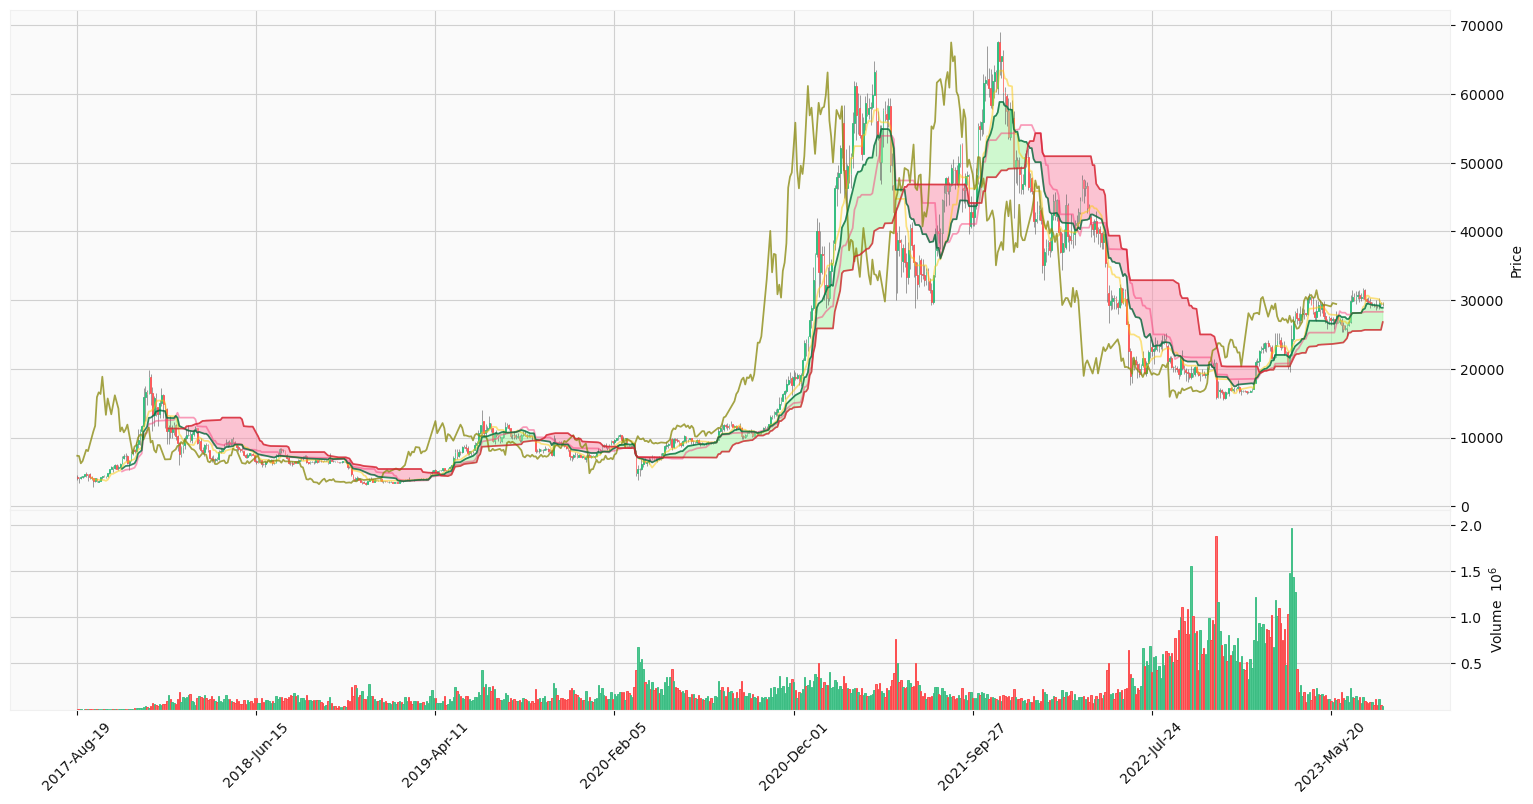

In [164]:
mpf.plot(
    df.set_index('Close Time'),
    volume=True,
    type="candle", 
    fill_between = [ichimoko_fill_up,ichimoko_fill_down],
    style="yahoo",
    addplot=ic,
    figsize=(20,10)
)

# mpf.plot(historical_df2.set_index('Close Time').tail(100), type='candle', style='yahoo', volume=True, title='Bitcoin 3D Timeframe', mav=(8, 13, 21))

In [155]:
df

,Open Time,Open,High,Low,Close,Volume,Close Time,Tenkan-sen,Kijun-sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
0,2017-08-17,4261.48,4485.39,3850.00,4139.98,2376.348404,2017-08-19 23:59:59.999000064,NaN,NaN,NaN,NaN,7345.01
1,2017-08-20,4120.98,4211.08,3400.00,4040.00,2125.510940,2017-08-22 23:59:59.999000064,NaN,NaN,NaN,NaN,7303.00
2,2017-08-23,4040.00,4453.91,4013.89,4280.68,2362.168058,2017-08-25 23:59:59.999000064,NaN,NaN,NaN,NaN,6245.05
3,2017-08-26,4280.71,4400.00,4124.54,4386.69,1182.642269,2017-08-28 23:59:59.999000064,NaN,NaN,NaN,NaN,6574.99
4,2017-08-29,4353.65,4745.42,4313.55,4724.89,1968.970601,2017-08-31 23:59:59.999000064,NaN,NaN,NaN,NaN,7699.19
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-08-01,29232.26,30047.50,28585.70,29193.64,119378.222970,2023-08-03 23:59:59.999000064,30194.95,28302.1,29248.525,25676.645,NaN
726,2023-08-04,29193.65,29333.08,28807.54,29088.42,48375.669550,2023-08-06 23:59:59.999000064,30194.95,28302.1,29248.525,25676.645,NaN
727,2023-08-07,29088.43,30244.00,28701.03,29581.99,114671.298630,2023-08-09 23:59:59.999000064,30107.85,28302.1,29204.975,25676.645,NaN
728,2023-08-10,29581.99,29738.00,29252.45,29430.17,53071.978710,2023-08-12 23:59:59.999000064,29501.58,28302.1,28901.840,25676.645,NaN


In [174]:
#There is too much data in the previous chart so we are going to slice it to make it easier to view

tdf = df.iloc[529:,1:]

In [175]:
tdf

,Open,High,Low,Close,Volume,Close Time,Tenkan-sen,Kijun-sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
529,46914.17,51375.00,46630.00,50838.81,99910.67190,2021-12-23 23:59:59.999000064,50588.645,55500.15,53044.3975,49241.305,38729.57
530,50838.82,51810.00,49412.00,50775.49,73390.24796,2021-12-26 23:59:59.999000064,50588.645,55500.15,53044.3975,51200.570,39671.37
531,50775.48,52088.00,46096.99,46464.66,114144.42490,2021-12-29 23:59:59.999000064,49800.150,55500.15,52650.1500,52691.500,40917.90
532,46464.66,48548.26,45678.00,47722.65,84894.75690,2022-01-01 23:59:59.999000064,48772.000,55500.15,52136.0750,53166.350,41262.11
533,47722.66,47990.00,45500.00,45832.01,81493.95110,2022-01-04 23:59:59.999000064,48772.000,55500.15,52136.0750,53166.350,42882.76
...,...,...,...,...,...,...,...,...,...,...,...
725,29232.26,30047.50,28585.70,29193.64,119378.22297,2023-08-03 23:59:59.999000064,30194.950,28302.10,29248.5250,25676.645,NaN
726,29193.65,29333.08,28807.54,29088.42,48375.66955,2023-08-06 23:59:59.999000064,30194.950,28302.10,29248.5250,25676.645,NaN
727,29088.43,30244.00,28701.03,29581.99,114671.29863,2023-08-09 23:59:59.999000064,30107.850,28302.10,29204.9750,25676.645,NaN
728,29581.99,29738.00,29252.45,29430.17,53071.97871,2023-08-12 23:59:59.999000064,29501.580,28302.10,28901.8400,25676.645,NaN


ValueError: x and y must have same first dimension, but have shapes (201,) and (730,)

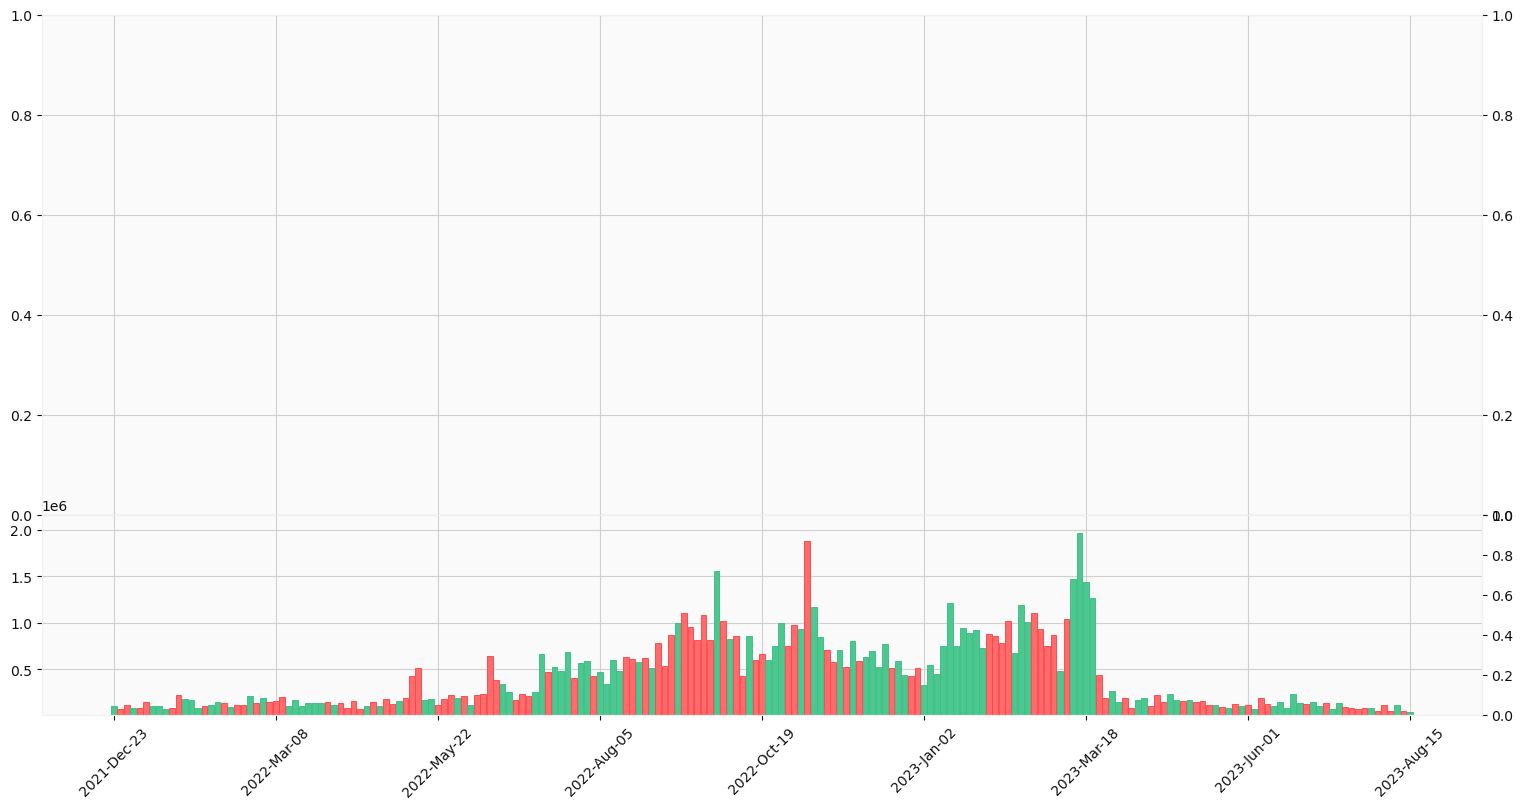

In [176]:
mpf.plot(
    tdf.set_index('Close Time'),
    volume=True,
    type="candle", 
    fill_between = [ichimoko_fill_up,ichimoko_fill_down],
    style="yahoo",
    addplot=ic,
    figsize=(20,10)
)


In [177]:
#We got a shape error likely because indexing is messed up, so let's slice first then do Ichimoku Cloud function

historical_df2

,Open Time,Open,High,Low,Close,Volume,Close Time,Tenkan-sen,Kijun-sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
0,2017-08-17,4261.48,4485.39,3850.00,4139.98,2376.348404,2017-08-19 23:59:59.999000064,NaN,NaN,NaN,NaN,7345.01
1,2017-08-20,4120.98,4211.08,3400.00,4040.00,2125.510940,2017-08-22 23:59:59.999000064,NaN,NaN,NaN,NaN,7303.00
2,2017-08-23,4040.00,4453.91,4013.89,4280.68,2362.168058,2017-08-25 23:59:59.999000064,NaN,NaN,NaN,NaN,6245.05
3,2017-08-26,4280.71,4400.00,4124.54,4386.69,1182.642269,2017-08-28 23:59:59.999000064,NaN,NaN,NaN,NaN,6574.99
4,2017-08-29,4353.65,4745.42,4313.55,4724.89,1968.970601,2017-08-31 23:59:59.999000064,NaN,NaN,NaN,NaN,7699.19
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-08-01,29232.26,30047.50,28585.70,29193.64,119378.222970,2023-08-03 23:59:59.999000064,30194.95,28302.1,29248.525,25676.645,NaN
726,2023-08-04,29193.65,29333.08,28807.54,29088.42,48375.669550,2023-08-06 23:59:59.999000064,30194.95,28302.1,29248.525,25676.645,NaN
727,2023-08-07,29088.43,30244.00,28701.03,29581.99,114671.298630,2023-08-09 23:59:59.999000064,30107.85,28302.1,29204.975,25676.645,NaN
728,2023-08-10,29581.99,29738.00,29252.45,29430.17,53071.978710,2023-08-12 23:59:59.999000064,29501.58,28302.1,28901.840,25676.645,NaN


In [179]:
df

,Open Time,Open,High,Low,Close,Volume,Close Time,Tenkan-sen,Kijun-sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
0,2017-08-17,4261.48,4485.39,3850.00,4139.98,2376.348404,2017-08-19 23:59:59.999000064,NaN,NaN,NaN,NaN,7345.01
1,2017-08-20,4120.98,4211.08,3400.00,4040.00,2125.510940,2017-08-22 23:59:59.999000064,NaN,NaN,NaN,NaN,7303.00
2,2017-08-23,4040.00,4453.91,4013.89,4280.68,2362.168058,2017-08-25 23:59:59.999000064,NaN,NaN,NaN,NaN,6245.05
3,2017-08-26,4280.71,4400.00,4124.54,4386.69,1182.642269,2017-08-28 23:59:59.999000064,NaN,NaN,NaN,NaN,6574.99
4,2017-08-29,4353.65,4745.42,4313.55,4724.89,1968.970601,2017-08-31 23:59:59.999000064,NaN,NaN,NaN,NaN,7699.19
...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-08-01,29232.26,30047.50,28585.70,29193.64,119378.222970,2023-08-03 23:59:59.999000064,30194.95,28302.1,29248.525,25676.645,NaN
726,2023-08-04,29193.65,29333.08,28807.54,29088.42,48375.669550,2023-08-06 23:59:59.999000064,30194.95,28302.1,29248.525,25676.645,NaN
727,2023-08-07,29088.43,30244.00,28701.03,29581.99,114671.298630,2023-08-09 23:59:59.999000064,30107.85,28302.1,29204.975,25676.645,NaN
728,2023-08-10,29581.99,29738.00,29252.45,29430.17,53071.978710,2023-08-12 23:59:59.999000064,29501.58,28302.1,28901.840,25676.645,NaN


In [188]:
df = df.drop(['Tenkan-sen', 'Kijun-sen', 'Senkou_Span_A', 'Senkou_Span_B', 'Chikou_Span'], axis=1)

In [189]:
df

,Open Time,Open,High,Low,Close,Volume,Close Time
0,2017-08-17,4261.48,4485.39,3850.00,4139.98,2376.348404,2017-08-19 23:59:59.999000064
1,2017-08-20,4120.98,4211.08,3400.00,4040.00,2125.510940,2017-08-22 23:59:59.999000064
2,2017-08-23,4040.00,4453.91,4013.89,4280.68,2362.168058,2017-08-25 23:59:59.999000064
3,2017-08-26,4280.71,4400.00,4124.54,4386.69,1182.642269,2017-08-28 23:59:59.999000064
4,2017-08-29,4353.65,4745.42,4313.55,4724.89,1968.970601,2017-08-31 23:59:59.999000064
...,...,...,...,...,...,...,...
725,2023-08-01,29232.26,30047.50,28585.70,29193.64,119378.222970,2023-08-03 23:59:59.999000064
726,2023-08-04,29193.65,29333.08,28807.54,29088.42,48375.669550,2023-08-06 23:59:59.999000064
727,2023-08-07,29088.43,30244.00,28701.03,29581.99,114671.298630,2023-08-09 23:59:59.999000064
728,2023-08-10,29581.99,29738.00,29252.45,29430.17,53071.978710,2023-08-12 23:59:59.999000064


In [190]:
#Slicing dataset to get last 200 data points

tdf = df.iloc[529:,1:]

In [191]:
tdf

,Open,High,Low,Close,Volume,Close Time
529,46914.17,51375.00,46630.00,50838.81,99910.67190,2021-12-23 23:59:59.999000064
530,50838.82,51810.00,49412.00,50775.49,73390.24796,2021-12-26 23:59:59.999000064
531,50775.48,52088.00,46096.99,46464.66,114144.42490,2021-12-29 23:59:59.999000064
532,46464.66,48548.26,45678.00,47722.65,84894.75690,2022-01-01 23:59:59.999000064
533,47722.66,47990.00,45500.00,45832.01,81493.95110,2022-01-04 23:59:59.999000064
...,...,...,...,...,...,...
725,29232.26,30047.50,28585.70,29193.64,119378.22297,2023-08-03 23:59:59.999000064
726,29193.65,29333.08,28807.54,29088.42,48375.66955,2023-08-06 23:59:59.999000064
727,29088.43,30244.00,28701.03,29581.99,114671.29863,2023-08-09 23:59:59.999000064
728,29581.99,29738.00,29252.45,29430.17,53071.97871,2023-08-12 23:59:59.999000064


In [192]:
#Resetting index after slice

tdf = tdf.reset_index()

In [193]:
tdf

,index,Open,High,Low,Close,Volume,Close Time
0,529,46914.17,51375.00,46630.00,50838.81,99910.67190,2021-12-23 23:59:59.999000064
1,530,50838.82,51810.00,49412.00,50775.49,73390.24796,2021-12-26 23:59:59.999000064
2,531,50775.48,52088.00,46096.99,46464.66,114144.42490,2021-12-29 23:59:59.999000064
3,532,46464.66,48548.26,45678.00,47722.65,84894.75690,2022-01-01 23:59:59.999000064
4,533,47722.66,47990.00,45500.00,45832.01,81493.95110,2022-01-04 23:59:59.999000064
...,...,...,...,...,...,...,...
196,725,29232.26,30047.50,28585.70,29193.64,119378.22297,2023-08-03 23:59:59.999000064
197,726,29193.65,29333.08,28807.54,29088.42,48375.66955,2023-08-06 23:59:59.999000064
198,727,29088.43,30244.00,28701.03,29581.99,114671.29863,2023-08-09 23:59:59.999000064
199,728,29581.99,29738.00,29252.45,29430.17,53071.97871,2023-08-12 23:59:59.999000064


In [194]:
tdf = tdf.drop(['index'], axis=1)

In [195]:
tdf

,Open,High,Low,Close,Volume,Close Time
0,46914.17,51375.00,46630.00,50838.81,99910.67190,2021-12-23 23:59:59.999000064
1,50838.82,51810.00,49412.00,50775.49,73390.24796,2021-12-26 23:59:59.999000064
2,50775.48,52088.00,46096.99,46464.66,114144.42490,2021-12-29 23:59:59.999000064
3,46464.66,48548.26,45678.00,47722.65,84894.75690,2022-01-01 23:59:59.999000064
4,47722.66,47990.00,45500.00,45832.01,81493.95110,2022-01-04 23:59:59.999000064
...,...,...,...,...,...,...
196,29232.26,30047.50,28585.70,29193.64,119378.22297,2023-08-03 23:59:59.999000064
197,29193.65,29333.08,28807.54,29088.42,48375.66955,2023-08-06 23:59:59.999000064
198,29088.43,30244.00,28701.03,29581.99,114671.29863,2023-08-09 23:59:59.999000064
199,29581.99,29738.00,29252.45,29430.17,53071.97871,2023-08-12 23:59:59.999000064


In [197]:
#re-doing ichimoko formula with sliced dataset

tdf['Tenkan-sen'] = (tdf['High'].rolling(window=9).max() + tdf['Low'].rolling(window=9).min()) / 2
tdf['Kijun-sen'] = (tdf['High'].rolling(window=26).max() + tdf['Low'].rolling(window=26).min()) / 2 
tdf['Senkou_Span_A'] = (tdf['Tenkan-sen'] + tdf['Kijun-sen']) / 2 
tdf['Senkou_Span_B'] = (tdf['High'].rolling(window=52).max() + tdf['Low'].rolling(window=52).min()) / 2 
tdf['Chikou_Span'] = tdf['Close'].shift(periods=-26) 

a = tdf[['Tenkan-sen']]
b = tdf[['Kijun-sen']]
c = tdf[['Chikou_Span']]
d = tdf[['Senkou_Span_A']]
e = tdf[['Senkou_Span_B']]

In [198]:
ic = [
    mpf.make_addplot(a,color='#fcc905',alpha=0.5,),
    mpf.make_addplot(b,color='#F83C78',alpha=0.5,),
    mpf.make_addplot(c,color='#8D8D16',alpha=0.8,),
    mpf.make_addplot(d,color='#006B3D',alpha=0.8,),
    mpf.make_addplot(e,color='#D3212C',alpha=0.8,),
]

In [199]:
ichimoko_fill_up = dict(y1 = tdf['Senkou_Span_A'].values, y2 = tdf['Senkou_Span_B'].values, where = tdf['Senkou_Span_A'] >= tdf['Senkou_Span_B'], alpha = 0.5, color = '#a6f7a6')
ichimoko_fill_down = dict(y1 = tdf['Senkou_Span_A'].values, y2 = tdf['Senkou_Span_B'].values, where = tdf['Senkou_Span_A'] < tdf['Senkou_Span_B'], alpha = 0.5, color = '#FC8EAC')


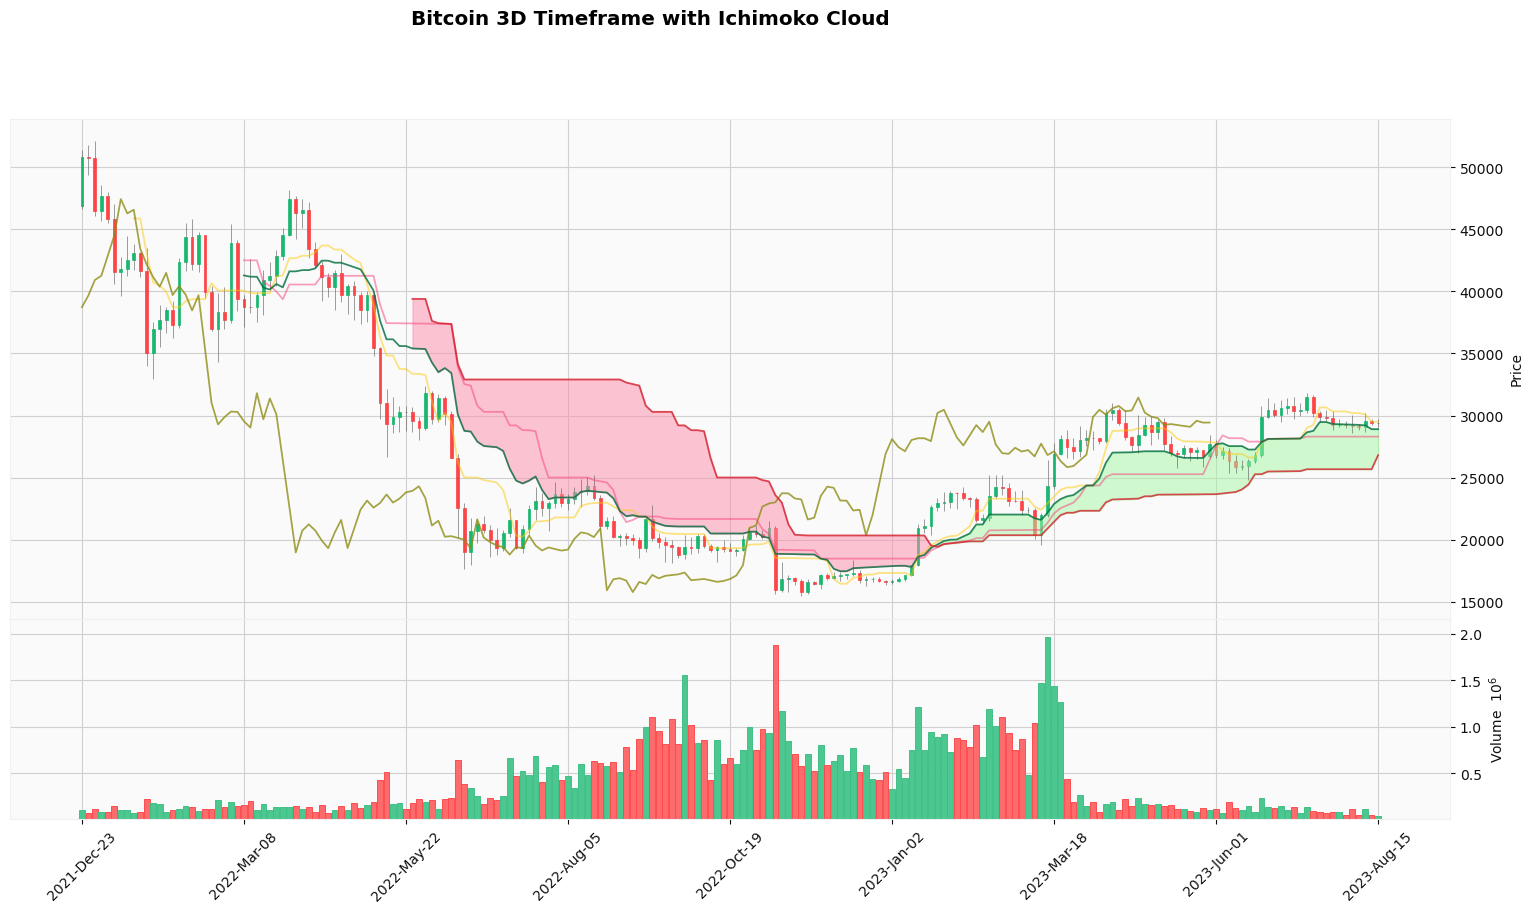

In [206]:
mpf.plot(
    tdf.set_index('Close Time'),
    volume=True,
    type="candle", 
    fill_between = [ichimoko_fill_up,ichimoko_fill_down],
    style="yahoo",
    title='Bitcoin 3D Timeframe with Ichimoko Cloud',
    addplot=ic,
    figsize=(20,10)
)

In [ ]:
#Insights gained from this Exploratory data analysis of Binance Bitcoin API Data:
#The Ichimoko Cloud had crossed up (green) back in January of 2023 and price has been riding the Ichimoku Cloud since then
#with higher lows and in a bullish trend.